In [5]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, text, MetaData
from sqlalchemy.exc import IntegrityError
import numpy as np

In [6]:
engine = create_engine('postgresql:///piwheels')
conn = engine.connect()
meta = MetaData()
meta.bind = conn
meta.reflect(views=True)

In [16]:
start_date = '2021-01-01'
start_time = '2021-01-01 00:00:00'
end_date = '2021-03-31'
end_time = '2021-04-01 00:00:00'
one_year_ago = '2020-04-01'

In [8]:
pd.read_sql(f"""
    SELECT COUNT(*) AS downloads_in_period
    FROM downloads
    WHERE accessed_at::date BETWEEN '{start_date}' AND '{end_date}'
""", conn)

,downloads_in_period
0,9262754


In [9]:
pd.read_sql(f"""
    SELECT COUNT(*) AS downloads_to_date
    FROM downloads
    WHERE accessed_at::date < '{end_date}'
""", conn)

,downloads_to_date
0,40096797


In [10]:
pd.read_sql(f"""
    SELECT COUNT(*) AS project_page_hits
    FROM project_page_hits
    WHERE accessed_at::date BETWEEN '{start_date}' AND '{end_date}'
""", conn)

,project_page_hits
0,722140


In [11]:
pd.read_sql(f"""
    SELECT COUNT(*) AS project_json_downloads
    FROM project_json_downloads
    WHERE accessed_at::date BETWEEN '{start_date}' AND '{end_date}'
""", conn)

,project_json_downloads
0,84621


In [12]:
pd.read_sql(f"""
    SELECT COUNT(*) AS web_page_hits
    FROM web_page_hits
    WHERE accessed_at::date BETWEEN '{start_date}' AND '{end_date}'
""", conn)

,web_page_hits
0,399097


In [17]:
downloads_by_month = pd.read_sql(f"""
    SELECT date_trunc('month', accessed_at) m, COUNT(*) AS c
    FROM downloads
    WHERE accessed_at::date BETWEEN '{one_year_ago}' AND '{end_date}'
    GROUP BY m
    ORDER BY m
""", conn)

downloads_by_month

,m,c
0,2020-04-01,1239451
1,2020-05-01,1271968
2,2020-06-01,1170659
3,2020-07-01,1102139
4,2020-08-01,1737186
5,2020-09-01,1653471
6,2020-10-01,1850781
7,2020-11-01,1240661
8,2020-12-01,1552508
9,2021-01-01,1960137


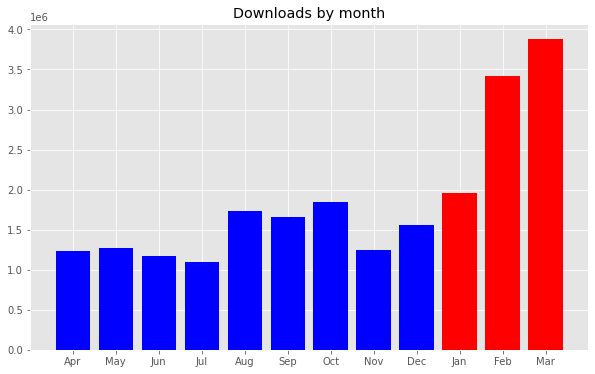

In [18]:
plt.rcParams["figure.figsize"] = (10, 6)

downloads = {
    'Apr': downloads_by_month.c[0],
    'May': downloads_by_month.c[1],
    'Jun': downloads_by_month.c[2],
    'Jul': downloads_by_month.c[3],
    'Aug': downloads_by_month.c[4],
    'Sep': downloads_by_month.c[5],
    'Oct': downloads_by_month.c[6],
    'Nov': downloads_by_month.c[7],
    'Dec': downloads_by_month.c[8],
    'Jan': downloads_by_month.c[9],
    'Feb': downloads_by_month.c[10],
    'Mar': downloads_by_month.c[11],
}

colors = ['blue']*9 + ['red']*3
plt.bar(range(len(downloads)), downloads.values(), color=colors)
plt.title('Downloads by month')
plt.xticks(range(len(downloads)), list(downloads.keys()))

plt.savefig('downloads-by-month.png')

plt.show()

In [19]:
downloads_by_day = pd.read_sql(f"""
    SELECT accessed_at::date AS d, COUNT(*) AS downloads
    FROM downloads
    WHERE accessed_at::date BETWEEN '{start_date}' AND '{end_date}'
    GROUP BY d
    ORDER BY d
""", conn)

downloads_by_day

,d,downloads
0,2021-01-01,45005
1,2021-01-02,49371
2,2021-01-03,49380
3,2021-01-04,50458
4,2021-01-05,62765
...,...,...
85,2021-03-27,100485
86,2021-03-28,98778
87,2021-03-29,129207
88,2021-03-30,142381


In [81]:
list(downloads_by_day['downloads'])

[45005,
 49371,
 49380,
 50458,
 62765,
 57112,
 60234,
 50191,
 52114,
 47987,
 53149,
 60557,
 50917,
 68074,
 57472,
 65114,
 41365,
 72266,
 65297,
 73069,
 78433,
 76858,
 73350,
 78642,
 67019,
 96992,
 63847,
 70139,
 76728,
 73507,
 72725,
 72051,
 96099,
 133541,
 119176,
 114690,
 120603,
 125135,
 126517,
 126893,
 125369,
 121377,
 135326,
 121576,
 124809,
 133277,
 109041,
 113174,
 119986,
 131926,
 99569,
 91399,
 140993,
 121700,
 168570,
 151396,
 149312,
 106895,
 123632,
 118141,
 138679,
 135292,
 123089,
 108978,
 113933,
 107947,
 124523,
 123324,
 131861,
 125142,
 118475,
 103053,
 115639,
 123075,
 142317,
 147776,
 142371,
 125039,
 110895,
 141654,
 123204,
 138086,
 128641,
 135290,
 125110,
 100485,
 98778,
 129207,
 142381,
 136200]

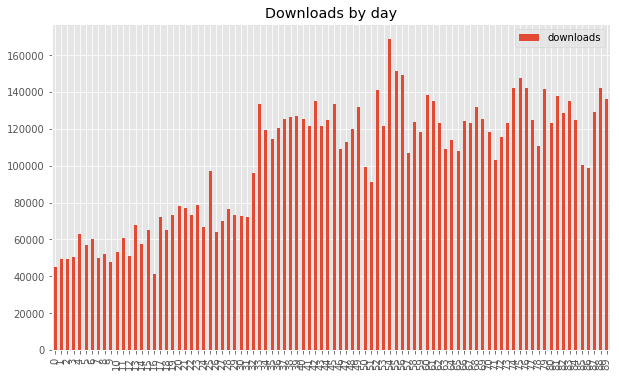

In [20]:
p = downloads_by_day.plot.bar(title='Downloads by day')
p.figure.savefig('downloads-by-day.png')

In [21]:
df = pd.read_sql(f"""
    SELECT COUNT(*) AS searches_in_period
    FROM searches
    WHERE accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
""", conn)

searches = df.values[0][0]
searches

59141950

In [22]:
pd.read_sql(f"""
    SELECT date_trunc('month', accessed_at) AS month, COUNT(*) AS searches
    FROM searches
    WHERE accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    GROUP BY month
    ORDER BY month
""", conn)

,month,searches
0,2021-01-01,9968928
1,2021-02-01,21435151
2,2021-03-01,27737871


In [23]:
searches_by_day = pd.read_sql(f"""
    SELECT accessed_at::date AS day, COUNT(*) AS searches
    FROM searches
    WHERE accessed_at::date BETWEEN '{start_date}' AND '{end_date}'
    GROUP BY day
    ORDER BY day
""", conn)

searches_by_day

,day,searches
0,2021-01-01,265163
1,2021-01-02,262441
2,2021-01-03,257576
3,2021-01-04,259336
4,2021-01-05,330952
...,...,...
85,2021-03-27,729311
86,2021-03-28,721691
87,2021-03-29,819354
88,2021-03-30,802443


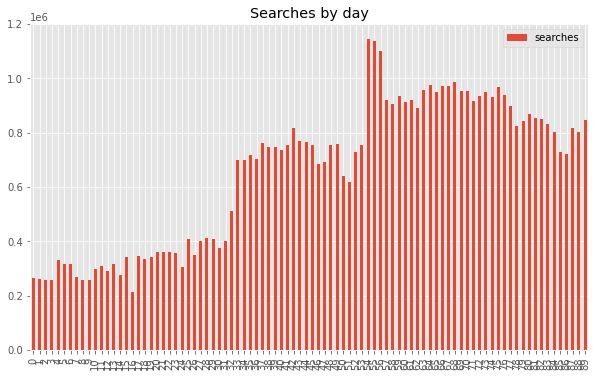

In [24]:
p = searches_by_day.plot.bar(title='Searches by day')
p.figure.savefig('searches-by-day.png')

In [25]:
pd.read_sql(f"""
    SELECT JUSTIFY_INTERVAL(SUM(
        CASE f.platform_tag
            WHEN 'linux_armv7l' THEN 1                           
            WHEN 'linux_armv6l' THEN 6                                                       
            ELSE 0           
        END *
        CASE                        
            WHEN b.duration > INTERVAL '1 week' THEN INTERVAL '0'
            WHEN b.duration > INTERVAL '6.7 seconds' THEN b.duration - INTERVAL '6.7 seconds'
            ELSE INTERVAL '0'               
        END                  
        )) AS total_time_saved_in_quarter                        
    FROM downloads d
    JOIN files f ON d.filename = f.filename
    JOIN builds b ON b.build_id = f.build_id
    WHERE f.abi_tag <> 'none'
    AND d.accessed_at::date between '{start_date}' and '{end_date}'
""", conn)

,total_time_saved_in_quarter
0,17011 days 01:40:52.150383


In [27]:
time_saved_by_month = pd.read_sql(f"""
    SELECT date_trunc('month', d.accessed_at) as month, JUSTIFY_INTERVAL(SUM(
        CASE f.platform_tag
            WHEN 'linux_armv7l' THEN 1
            WHEN 'linux_armv6l' THEN 6
            ELSE 0
        END *
        CASE
            WHEN b.duration > INTERVAL '1 week' THEN INTERVAL '0'
            WHEN b.duration > INTERVAL '6.7 seconds' THEN b.duration - INTERVAL '6.7 seconds'
            ELSE INTERVAL '0'
        END
            )) AS time_saved_in_month
    FROM downloads d
    JOIN files f ON d.filename = f.filename
    JOIN builds b ON b.build_id = f.build_id
    WHERE f.abi_tag <> 'none'
    AND d.accessed_at::date between '{one_year_ago}' and '{end_date}'
    GROUP BY month
    ORDER BY month
""", conn)

time_saved_by_month

,month,time_saved_in_month
0,2020-04-01,7988 days 01:37:30.597478
1,2020-05-01,9265 days 21:54:39.625636
2,2020-06-01,9093 days 15:58:46.802963
3,2020-07-01,8705 days 12:32:39.953176
4,2020-08-01,11232 days 02:08:49.566210
5,2020-09-01,9514 days 20:08:16.196525
6,2020-10-01,8045 days 18:29:43.486867
7,2020-11-01,6349 days 07:37:54.756243
8,2020-12-01,5882 days 16:33:21.660789
9,2021-01-01,3988 days 02:52:29.327372


In [31]:
time_saved_by_month.time_saved_in_month[0].days

7988

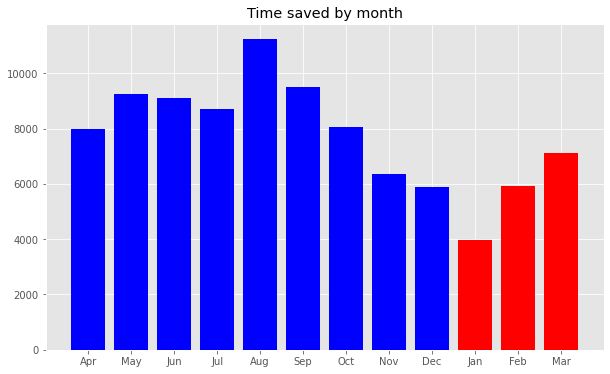

In [32]:
time_saved = {
    'Apr': time_saved_by_month.time_saved_in_month[0].days,
    'May': time_saved_by_month.time_saved_in_month[1].days,
    'Jun': time_saved_by_month.time_saved_in_month[2].days,
    'Jul': time_saved_by_month.time_saved_in_month[3].days,
    'Aug': time_saved_by_month.time_saved_in_month[4].days,
    'Sep': time_saved_by_month.time_saved_in_month[5].days,
    'Oct': time_saved_by_month.time_saved_in_month[6].days,
    'Nov': time_saved_by_month.time_saved_in_month[7].days,
    'Dec': time_saved_by_month.time_saved_in_month[8].days,
    'Jan': time_saved_by_month.time_saved_in_month[9].days,
    'Feb': time_saved_by_month.time_saved_in_month[10].days,
    'Mar': time_saved_by_month.time_saved_in_month[11].days,
}

colors = ['blue']*9 + ['red']*3
plt.bar(range(len(time_saved)), time_saved.values(), color=colors)
plt.title('Time saved by month')
plt.xticks(range(len(time_saved)), list(time_saved.keys()))

plt.savefig('time-saved-by-month.png')

plt.show()

In [33]:
top_10_downloads = pd.read_sql(f"""
    select b.package, count(*) c
    from downloads d
    join files f on f.filename = d.filename
    join builds b on b.build_id = f.build_id
    where accessed_at::date between '{start_date}' and '{end_date}'
    group by b.package
    order by c desc
    limit 10;
""", conn)

top_10_downloads

,package,c
0,requests,183869
1,numpy,169759
2,chardet,152524
3,setuptools,139034
4,idna,119761
5,urllib3,115392
6,pip,108285
7,certifi,107014
8,typing-extensions,102449
9,h11,102242


In [34]:
print("<ol>")
for i, row in top_10_downloads.iterrows():
    print(f"<li><strong><a href='https://www.piwheels.org/project/{row['package']}'>{row['package']}</a></strong> ({row['c']:,})</li>")
print("</ol>")

<ol>
<li><strong><a href='https://www.piwheels.org/project/requests'>requests</a></strong> (183,869)</li>
<li><strong><a href='https://www.piwheels.org/project/numpy'>numpy</a></strong> (169,759)</li>
<li><strong><a href='https://www.piwheels.org/project/chardet'>chardet</a></strong> (152,524)</li>
<li><strong><a href='https://www.piwheels.org/project/setuptools'>setuptools</a></strong> (139,034)</li>
<li><strong><a href='https://www.piwheels.org/project/idna'>idna</a></strong> (119,761)</li>
<li><strong><a href='https://www.piwheels.org/project/urllib3'>urllib3</a></strong> (115,392)</li>
<li><strong><a href='https://www.piwheels.org/project/pip'>pip</a></strong> (108,285)</li>
<li><strong><a href='https://www.piwheels.org/project/certifi'>certifi</a></strong> (107,014)</li>
<li><strong><a href='https://www.piwheels.org/project/typing-extensions'>typing-extensions</a></strong> (102,449)</li>
<li><strong><a href='https://www.piwheels.org/project/h11'>h11</a></strong> (102,242)</li>
</o

In [35]:
top_10_searches = pd.read_sql(f"""
    select package, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    group by package
    order by c desc
    limit 10;
""", conn)

top_10_searches

,package,c
0,pip,8010081
1,wheel,5111590
2,setuptools,2735718
3,pyrogram,972037
4,aiodns,957426
5,aiohttp,943986
6,six,764481
7,requests,677639
8,future,637936
9,distro,524132


In [36]:
print("<ol>")
for pkg, c in top_10_searches.values:
    print(f"<li><strong><a href='https://www.piwheels.org/project/{pkg}'>{pkg}</a></strong> ({c:,})</li>")
print("</ol>")

<ol>
<li><strong><a href='https://www.piwheels.org/project/pip'>pip</a></strong> (8,010,081)</li>
<li><strong><a href='https://www.piwheels.org/project/wheel'>wheel</a></strong> (5,111,590)</li>
<li><strong><a href='https://www.piwheels.org/project/setuptools'>setuptools</a></strong> (2,735,718)</li>
<li><strong><a href='https://www.piwheels.org/project/pyrogram'>pyrogram</a></strong> (972,037)</li>
<li><strong><a href='https://www.piwheels.org/project/aiodns'>aiodns</a></strong> (957,426)</li>
<li><strong><a href='https://www.piwheels.org/project/aiohttp'>aiohttp</a></strong> (943,986)</li>
<li><strong><a href='https://www.piwheels.org/project/six'>six</a></strong> (764,481)</li>
<li><strong><a href='https://www.piwheels.org/project/requests'>requests</a></strong> (677,639)</li>
<li><strong><a href='https://www.piwheels.org/project/future'>future</a></strong> (637,936)</li>
<li><strong><a href='https://www.piwheels.org/project/distro'>distro</a></strong> (524,132)</li>
</ol>


In [37]:
top_10_project_pages = pd.read_sql(f"""
    select package, count(*) c
    from project_page_hits
    where accessed_at::date between '{start_date}' and '{end_date}'
    group by package
    order by c desc
    limit 10;
""", conn)

top_10_project_pages

,package,c
0,opencv-python,1189
1,opencv-contrib-python,1172
2,numpy,1161
3,scipy,838
4,tensorflow,796
5,cryptography,588
6,pillow,517
7,pip,451
8,qhub-ops,441
9,grpcio,410


In [38]:
print("<ol>")
for pkg, c in top_10_project_pages.values:
    print(f"<li><strong><a href='https://www.piwheels.org/project/{pkg}'>{pkg}</a></strong> ({c:,})</li>")
print("</ol>")

<ol>
<li><strong><a href='https://www.piwheels.org/project/opencv-python'>opencv-python</a></strong> (1,189)</li>
<li><strong><a href='https://www.piwheels.org/project/opencv-contrib-python'>opencv-contrib-python</a></strong> (1,172)</li>
<li><strong><a href='https://www.piwheels.org/project/numpy'>numpy</a></strong> (1,161)</li>
<li><strong><a href='https://www.piwheels.org/project/scipy'>scipy</a></strong> (838)</li>
<li><strong><a href='https://www.piwheels.org/project/tensorflow'>tensorflow</a></strong> (796)</li>
<li><strong><a href='https://www.piwheels.org/project/cryptography'>cryptography</a></strong> (588)</li>
<li><strong><a href='https://www.piwheels.org/project/pillow'>pillow</a></strong> (517)</li>
<li><strong><a href='https://www.piwheels.org/project/pip'>pip</a></strong> (451)</li>
<li><strong><a href='https://www.piwheels.org/project/qhub-ops'>qhub-ops</a></strong> (441)</li>
<li><strong><a href='https://www.piwheels.org/project/grpcio'>grpcio</a></strong> (410)</li>
<

In [39]:
top_10_project_json = pd.read_sql(f"""
    select package, count(*) c
    from project_json_downloads
    where accessed_at::date between '{start_date}' and '{end_date}'
    group by package
    order by c desc
    limit 10;
""", conn)

top_10_project_json

,package,c
0,numpy,188
1,uvloop,126
2,scipy,78
3,opencv-python,51
4,tensorflow,45
5,cryptography,36
6,cffi,33
7,scikit-image,32
8,urllib3,28
9,pycparser,27


In [40]:
print("<ol>")
for pkg, c in top_10_project_json.values:
    print(f"<li><strong><a href='https://www.piwheels.org/project/{pkg}'>{pkg}</a></strong> ({c:,})</li>")
print("</ol>")

<ol>
<li><strong><a href='https://www.piwheels.org/project/numpy'>numpy</a></strong> (188)</li>
<li><strong><a href='https://www.piwheels.org/project/uvloop'>uvloop</a></strong> (126)</li>
<li><strong><a href='https://www.piwheels.org/project/scipy'>scipy</a></strong> (78)</li>
<li><strong><a href='https://www.piwheels.org/project/opencv-python'>opencv-python</a></strong> (51)</li>
<li><strong><a href='https://www.piwheels.org/project/tensorflow'>tensorflow</a></strong> (45)</li>
<li><strong><a href='https://www.piwheels.org/project/cryptography'>cryptography</a></strong> (36)</li>
<li><strong><a href='https://www.piwheels.org/project/cffi'>cffi</a></strong> (33)</li>
<li><strong><a href='https://www.piwheels.org/project/scikit-image'>scikit-image</a></strong> (32)</li>
<li><strong><a href='https://www.piwheels.org/project/urllib3'>urllib3</a></strong> (28)</li>
<li><strong><a href='https://www.piwheels.org/project/pycparser'>pycparser</a></strong> (27)</li>
</ol>


In [41]:
pd.read_sql(f"""
    select count(distinct(package)) c
    from project_json_downloads
    where accessed_at::date between '{start_date}' and '{end_date}'
""", conn)

,c
0,74505


In [42]:
pd.read_sql(f"""
    select user_agent, count(*) c
    from project_json_downloads
    where accessed_at::date between '{start_date}' and '{end_date}'
    group by user_agent
    order by c desc
""", conn)

,user_agent,c
0,mozilla,83771
1,ccbot,489
2,python-requests,159
3,lanaibotmarch,75
4,aaabot,56
5,python-urllib,43
6,curl,7
7,anybot,6
8,elisabot,4
9,wordpress,2


In [43]:
os_usage = pd.read_sql(f"""
    select os_name, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    group by os_name
    order by c desc
""", conn)

os_usage

,os_name,c
0,Linux,59111410
1,Windows,13624
2,Darwin,12260
3,FreeBSD,4644
4,None,12


In [89]:
linux_usage_pc = 100 * (os_usage.values[0][1] / searches)
print(f'{linux_usage_pc:2.2f}% linux')

99.95% linux


In [45]:
distro_usage = pd.read_sql(f"""
    select distro_name, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and os_name = 'Linux'
    group by distro_name
    order by c desc
    limit 5
""", conn)

distro_usage

,distro_name,c
0,Raspbian GNU/Linux,52228910
1,Debian GNU/Linux,5683290
2,Ubuntu,1098491
3,Alpine Linux,34535
4,Red Hat Enterprise Linux Server,16910


In [46]:
debian_usage = pd.read_sql(f"""
    select count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and os_name = 'Linux'
    and distro_name in ('Raspbian GNU/Linux', 'Debian GNU/Linux')
    order by c desc
    limit 5
""", conn)

debian_usage

,c
0,57912200


In [100]:
debian_usage_pc = 100 * (debian_usage.c[0] / searches)
print(f'{debian_usage_pc:2.2f}% debian')

97.92% debian


In [101]:
ubuntu_usage = pd.read_sql(f"""
    select count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and os_name = 'Linux'
    and distro_name = 'Ubuntu'
    order by c desc
    limit 5
""", conn)

ubuntu_usage_pc = 100 * (ubuntu_usage.c[0] / searches)
print(f'{ubuntu_usage_pc:2.2f}% ubuntu')

1.86% ubuntu


In [49]:
debian = debian_usage.values[0][0]
others = searches - debian

distro_usage = {
    'Debian / Raspbian / PiOS': debian,
    'Others': others,
}

distro_usage

{'Debian / Raspbian / PiOS': 57912200, 'Others': 1229750}

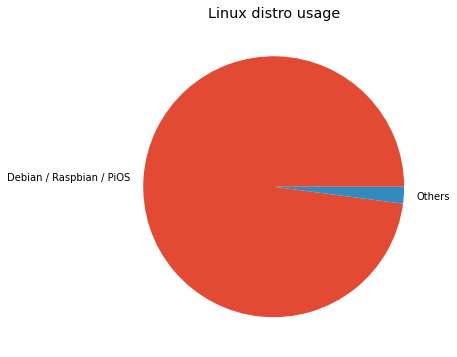

In [50]:
plt.pie(distro_usage.values(), labels=distro_usage.keys())
plt.title('Linux distro usage')

plt.savefig('distro-usage.png')

plt.show()

In [51]:
distro_versions = pd.read_sql(f"""
    select distro_version, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and os_name = 'Linux'
    and distro_name in ('Raspbian GNU/Linux', 'Debian GNU/Linux')
    and distro_version in ('8', '9', '10')
    group by distro_version
    order by c desc
""", conn)

distro_versions

,distro_version,c
0,10,53710485
1,9,4099280
2,8,1877


In [52]:
total = sum(distro_versions.c)

for v in distro_versions.values:
    print(v[0], f'{(100 * v[1] / total):.1f}%')

10 92.9%
9 7.1%
8 0.0%


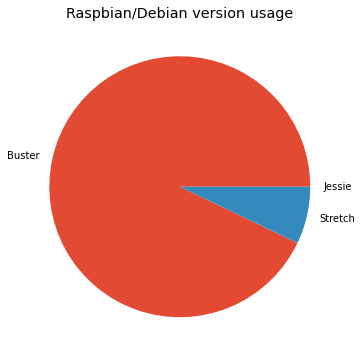

In [53]:
version_names = {'10': 'Buster', '9': 'Stretch', '8': 'Jessie'}
plt.pie(distro_versions.c, labels=[version_names[v] for v in distro_versions.distro_version])
plt.title('Raspbian/Debian version usage')

plt.savefig('debian-usage.png')

plt.show()

In [54]:
arch = pd.read_sql(f"""
    select arch, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    group by arch
    order by c desc
""", conn)

arch

,arch,c
0,armv7l,49915948
1,x86_64,4831119
2,armv6l,2206776
3,aarch64,2097318
4,i686,57991
5,AMD64,13621
6,armv8l,12336
7,amd64,4644
8,armv5tel,1016
9,arm64,854


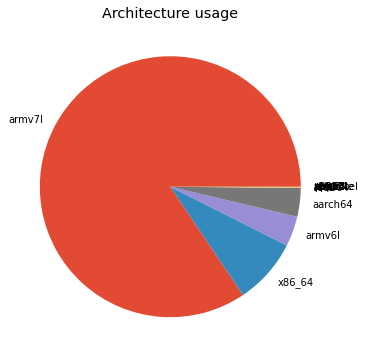

In [55]:
plt.pie(arch.c, labels=arch.arch)
plt.title('Architecture usage')

plt.savefig('arch.png')

plt.show()

In [56]:
arm_arch = pd.read_sql(f"""
    select arch, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and os_name = 'Linux'
    and distro_name in ('Raspbian GNU/Linux', 'Debian GNU/Linux')
    and arch in ('armv6l', 'armv7l', 'aarch64')
    group by arch
    order by c desc
""", conn)

total = sum(arm_arch.c)

for v in arm_arch.values:
    print(v[0], f'{(100 * v[1] / total):.1f}%') 

armv7l 92.1%
armv6l 4.1%
aarch64 3.8%


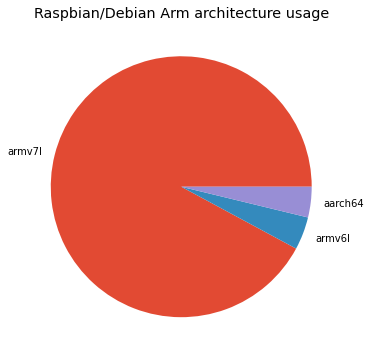

In [57]:
plt.pie(arm_arch.c, labels=arm_arch.arch)
plt.title('Raspbian/Debian Arm architecture usage')

plt.savefig('debian-arch.png')

plt.show()

In [108]:
py_vers = pd.read_sql(f"""
    select substring(py_version from 1 for 3) pyver, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and os_name = 'Linux'
    and distro_name in ('Raspbian GNU/Linux', 'Debian GNU/Linux')
    and arch in ('armv6l', 'armv7l', 'aarch64')
    and py_name = 'CPython'
    group by pyver
    order by c desc
    limit 6
""", conn)

py_vers

,pyver,c
0,3.7,36546216
1,2.7,12162558
2,3.8,2718211
3,3.9,1175685
4,3.5,1136274
5,3.6,372050


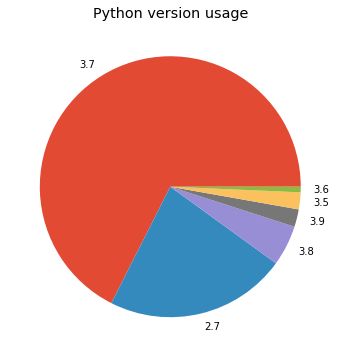

In [109]:
plt.pie(py_vers.c, labels=py_vers.pyver)
plt.title('Python version usage')

plt.savefig('py-vers.png')

plt.show()

In [110]:
total = sum(row[1] for row in py_vers.values)

for ver, c in py_vers.values:
    print(ver, f'{100 * (c / total):.2f}%')

3.7 67.54%
2.7 22.48%
3.8 5.02%
3.9 2.17%
3.5 2.10%
3.6 0.69%


In [61]:
pip_versions = pd.read_sql(f"""
    select installer_version, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and installer_name = 'pip'
    and installer_version is not null
    group by installer_version
    order by c desc
""", conn)

pip_versions[:10]

,installer_version,c
0,21.0.1,24298687
1,18.1,15748760
2,20.3.3,3674342
3,21.0,2437556
4,20.1.1,2323747
5,19.3.1,1942434
6,19.0.1,1360243
7,9.0.1,1288761
8,20.3.4,1209638
9,20.2.4,1062385


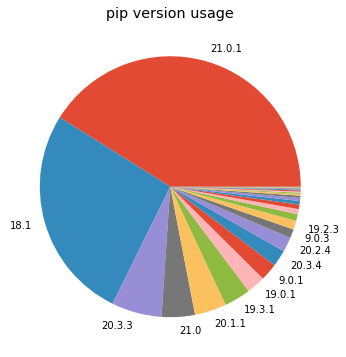

In [62]:
total = sum(v[1] for v in pip_versions.values)
labels = [v[0] if v[1] / total > 0.01 else '' for v in pip_versions.values]

plt.pie(pip_versions.c, labels=labels)
plt.title('pip version usage')

plt.savefig('pip-vers.png')

plt.show()

In [63]:
setuptools_versions = pd.read_sql(f"""
    select setuptools_version, count(*) c
    from searches
    where accessed_at >= '{start_time}' AND accessed_at < '{end_time}'
    and installer_name = 'pip'
    and setuptools_version is not null
    group by setuptools_version
    order by c desc
""", conn)

setuptools_versions[:10]

,setuptools_version,c
0,40.8.0,32258663
1,53.0.0,3669617
2,41.2.0,2108452
3,49.2.1,1506885
4,41.5.1,1393110
5,40.7.1,1323398
6,52.0.0,1172152
7,39.0.1,1140811
8,50.3.2,1098692
9,53.1.0,986801


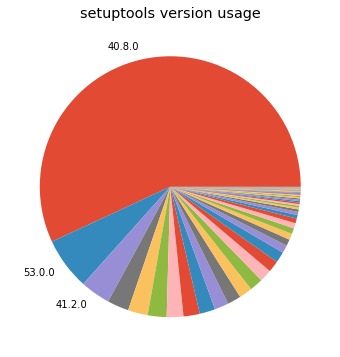

In [64]:
total = sum(v[1] for v in setuptools_versions.values)
labels = [v[0] if v[1] / total > 0.03 else '' for v in setuptools_versions.values]

plt.pie(setuptools_versions.c, labels=labels)
plt.title('setuptools version usage')

plt.savefig('setuptools-vers.png')

plt.show()